In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import yaml
import textwrap

YAMLCFG = """
%YAML 1.2
---
name: '64x6-test-6'                       # ideally no spaces
gpu: 0                                 # gpu id to process on

dataset: 
  num_chunks: 120000                   # newest nof chunks to parse
  train_ratio: 0.90                    # trainingset ratio
  # For separated test and train data.
  input_train: '/ramdisk/train/' # supports glob
  input_test: '/ramdisk/test/'  # supports glob
  # For a one-shot run with all data in one directory.
  #input: '/work/lc0/data/'

training:
    batch_size: 2048                   # training batch
    test_steps: 500                    # eval test set values after this many steps
    train_avg_report_steps: 250        # training reports its average values after this many steps.
    total_steps: 2500                 # terminate after these steps
    # checkpoint_steps: 10000          # optional frequency for checkpointing before finish
    shuffle_size: 500000               # size of the shuffle buffer
    lr_values:                         # list of learning rates
        - 0.001
        - 0.001
    lr_boundaries:                     # list of boundaries
        - 100
    policy_loss_weight: 1.0            # weight of policy loss
    value_loss_weight: 1.0             # weight of value loss
    path: '/work/lc0/networks'         # network storage dir

model:
  filters: 256
  residual_blocks: 20
  se_ratio: 8
...
"""
YAMLCFG = textwrap.dedent(YAMLCFG).strip()
cfg = yaml.safe_load(YAMLCFG)


In [4]:
import tensorflow as tf
from src.tfprocess import TFProcess
from src.net import Net

sess = tf.Session()

weights_file = "./weights_data/weights_run1_42087.pb.gz"
net = Net()
net.parse_proto(weights_file)

filters, blocks = net.filters(), net.blocks()
if cfg['model']['filters'] != filters:
    raise ValueError("Number of filters in YAML doesn't match the network")
if cfg['model']['residual_blocks'] != blocks:
    raise ValueError("Number of blocks in YAML doesn't match the network")

In [5]:
tfp = TFProcess(cfg)

x = tf.placeholder(tf.float32, [None, 112, 8*8])
y = tf.placeholder(tf.float32, [None, 1858])
z = tf.placeholder(tf.float32, [None, 3])
q = tf.placeholder(tf.float32, [None, 3])
inputs = [x, y, z, q]

tfp.init_net(inputs)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Summary name bn0/conv_weight:0 is illegal; using bn0/conv_weight_0 instead.
INFO:tensorflow:Summary name bn0/batch_normalization/gamma:0 is illegal; using bn0/batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn0/batch_normalization/beta:0 is illegal; using bn0/batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn0/batch_normalizati

INFO:tensorflow:Summary name bn8/se_fc1_b:0 is illegal; using bn8/se_fc1_b_0 instead.
INFO:tensorflow:Summary name bn8/se_fc2_w:0 is illegal; using bn8/se_fc2_w_0 instead.
INFO:tensorflow:Summary name bn8/se_fc2_b:0 is illegal; using bn8/se_fc2_b_0 instead.
INFO:tensorflow:Summary name bn9/conv_weight:0 is illegal; using bn9/conv_weight_0 instead.
INFO:tensorflow:Summary name bn9//batch_normalization/gamma:0 is illegal; using bn9//batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn9//batch_normalization/beta:0 is illegal; using bn9//batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn9//batch_normalization/moving_mean:0 is illegal; using bn9//batch_normalization/moving_mean_0 instead.
INFO:tensorflow:Summary name bn9//batch_normalization/moving_variance:0 is illegal; using bn9//batch_normalization/moving_variance_0 instead.
INFO:tensorflow:Summary name bn10/conv_weight:0 is illegal; using bn10/conv_weight_0 instead.
INFO:tensorflow:Summary name bn10//bat

INFO:tensorflow:Summary name bn19/conv_weight:0 is illegal; using bn19/conv_weight_0 instead.
INFO:tensorflow:Summary name bn19//batch_normalization/gamma:0 is illegal; using bn19//batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn19//batch_normalization/beta:0 is illegal; using bn19//batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn19//batch_normalization/moving_mean:0 is illegal; using bn19//batch_normalization/moving_mean_0 instead.
INFO:tensorflow:Summary name bn19//batch_normalization/moving_variance:0 is illegal; using bn19//batch_normalization/moving_variance_0 instead.
INFO:tensorflow:Summary name bn20/conv_weight:0 is illegal; using bn20/conv_weight_0 instead.
INFO:tensorflow:Summary name bn20//batch_normalization/gamma:0 is illegal; using bn20//batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn20//batch_normalization/beta:0 is illegal; using bn20//batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn20//batch

INFO:tensorflow:Summary name bn29//batch_normalization/moving_mean:0 is illegal; using bn29//batch_normalization/moving_mean_0 instead.
INFO:tensorflow:Summary name bn29//batch_normalization/moving_variance:0 is illegal; using bn29//batch_normalization/moving_variance_0 instead.
INFO:tensorflow:Summary name bn30/conv_weight:0 is illegal; using bn30/conv_weight_0 instead.
INFO:tensorflow:Summary name bn30//batch_normalization/gamma:0 is illegal; using bn30//batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn30//batch_normalization/beta:0 is illegal; using bn30//batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn30//batch_normalization/moving_mean:0 is illegal; using bn30//batch_normalization/moving_mean_0 instead.
INFO:tensorflow:Summary name bn30//batch_normalization/moving_variance:0 is illegal; using bn30//batch_normalization/moving_variance_0 instead.
INFO:tensorflow:Summary name bn30/se_fc1_w:0 is illegal; using bn30/se_fc1_w_0 instead.
INFO:tensorf

INFO:tensorflow:Summary name bn40/conv_weight:0 is illegal; using bn40/conv_weight_0 instead.
INFO:tensorflow:Summary name bn40//batch_normalization/gamma:0 is illegal; using bn40//batch_normalization/gamma_0 instead.
INFO:tensorflow:Summary name bn40//batch_normalization/beta:0 is illegal; using bn40//batch_normalization/beta_0 instead.
INFO:tensorflow:Summary name bn40//batch_normalization/moving_mean:0 is illegal; using bn40//batch_normalization/moving_mean_0 instead.
INFO:tensorflow:Summary name bn40//batch_normalization/moving_variance:0 is illegal; using bn40//batch_normalization/moving_variance_0 instead.
INFO:tensorflow:Summary name bn40/se_fc1_w:0 is illegal; using bn40/se_fc1_w_0 instead.
INFO:tensorflow:Summary name bn40/se_fc1_b:0 is illegal; using bn40/se_fc1_b_0 instead.
INFO:tensorflow:Summary name bn40/se_fc2_w:0 is illegal; using bn40/se_fc2_w_0 instead.
INFO:tensorflow:Summary name bn40/se_fc2_b:0 is illegal; using bn40/se_fc2_b_0 instead.
INFO:tensorflow:Summary name

In [ ]:
tfp.replace_weights(net.get_weights())

In [7]:
1

1

In [8]:
def eval_board(tfp, leela_board):
    input_planes = leela_board.lcz_features()
    input_planes = input_planes.reshape(-1, 112, 8 * 8)
    policy, value = tfp.session.run([tfp.y_conv, tfp.z_conv], {tfp.x: input_planes, tfp.training: False})

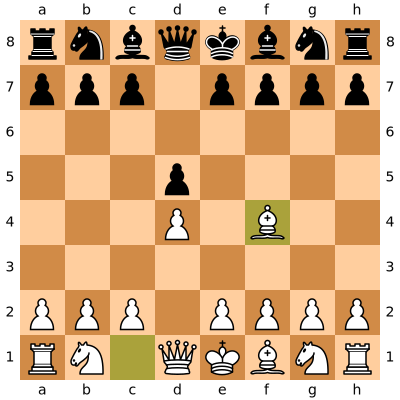

In [10]:
from src.leelaboard import LeelaBoard

board = LeelaBoard()
board.push_san('d4')
board.push_san('d5')
board.push_san('Bf4')

display(board)

In [11]:
eval_board(tfp, board)

UnimplementedError: Generic conv implementation only supports NHWC tensor format for now.
	 [[node bn0/Conv2D (defined at /Users/advait/leela/leela-transfer/src/tfprocess.py:59) ]]

Caused by op 'bn0/Conv2D', defined at:
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 708, in __init__
    self.run()
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-a22e9a00796c>", line 9, in <module>
    tfp.init_net(inputs)
  File "/Users/advait/leela/leela-transfer/src/tfprocess.py", line 141, in init_net
    self.y_conv, self.z_conv = self.construct_net(self.x)
  File "/Users/advait/leela/leela-transfer/src/tfprocess.py", line 801, in construct_net
    bn_scale=True)
  File "/Users/advait/leela/leela-transfer/src/tfprocess.py", line 707, in conv_block
    h_bn = self.batch_norm(conv2d(inputs, W_conv), scale=bn_scale)
  File "/Users/advait/leela/leela-transfer/src/tfprocess.py", line 59, in conv2d
    strides=[1, 1, 1, 1], padding='SAME')
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1026, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/advait/.local/share/virtualenvs/leela-transfer-MYgo6fvh/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

UnimplementedError (see above for traceback): Generic conv implementation only supports NHWC tensor format for now.
	 [[node bn0/Conv2D (defined at /Users/advait/leela/leela-transfer/src/tfprocess.py:59) ]]
